In [54]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

In [56]:
data = pd.read_csv('trainData.data', delimiter = ' ', header = None)

In [ ]:
TEST_data = pd.read_csv('testData1.data', delimiter = ' ', header = None)

In [76]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_TEST = TEST_data.iloc[:, :-1]
Y_TEST = TEST_data.iloc[:, -1]

In [77]:
# Standardizing data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_TEST = scaler.transform(X_TEST)
print(X)
#scaler.fit_transform(X)

[[ 0.67429718 -0.66041367 -1.34858796 ... -1.44298362  0.27526042
  -1.08943129]
 [-0.11511662 -0.48380799  0.52414012 ... -1.36925386 -1.09997337
   0.70900002]
 [-2.39273398  2.91562597  2.1118062  ... -1.1587686   1.23454031
   0.19986577]
 ...
 [-1.18934115  0.85688533  0.78507014 ... -0.77075231  1.4621364
  -1.61840523]
 [ 0.96277293  0.60066653 -0.00723339 ... -0.80261814  1.70600332
   0.7459598 ]
 [-1.36269156  0.96184025 -0.0798191  ... -1.15154195 -1.36968334
   1.0057203 ]]


In [78]:
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, Y, train_size=0.8, shuffle=True)

In [79]:
print(X_train_raw)

[[-1.65175085  1.43630451  1.0252115  ...  1.25454251 -1.11026809
   0.33286844]
 [-0.84417962  0.19530005  0.76315512 ... -0.52490161  0.61337783
   0.80525244]
 [ 1.41776287 -0.44764374 -1.33288795 ...  0.03923807 -1.28346659
  -1.25135315]
 ...
 [ 0.34570992 -2.01545309 -0.02488605 ... -0.54043775  0.10764833
   0.5210881 ]
 [ 1.13415801  0.27776276 -0.929891   ... -0.86768092  0.808888
  -0.21051349]
 [ 0.7553296  -0.58478934 -1.83174358 ...  0.97484597 -0.68587246
   1.20911981]]


In [80]:
X_train = torch.tensor(X_train_raw, dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1,1)
X_valid = torch.tensor(X_val_raw, dtype=torch.float32)
y_valid = torch.tensor(y_val.to_numpy(), dtype=torch.float32).reshape(-1, 1)

#for test data
X_TEST = torch.tensor(X_TEST, dtype=torch.float32)
Y_TEST = torch.tensor(Y_TEST.to_numpy(), dtype=torch.float32).reshape(-1, 1)

In [81]:
batch_size = 64

train_loader = DataLoader(list(zip(X_train,y_train)), shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(list(zip(X_valid,y_valid)), shuffle=True, batch_size=batch_size)
TEST_loader = DataLoader(list(zip(X_TEST,Y_TEST)), shuffle=True, batch_size=batch_size)

In [82]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_features, output_features):
      super().__init__()
      self.stack = nn.Sequential(
          nn.Linear(input_features, 50),
          nn.ReLU(),
          nn.Linear(50, 10),
          nn.ReLU(),
          nn.Linear(10,output_features))
    def forward(self, x):
      logits = self.stack(x)
      return logits

#self.layer1 = nn.Linear(input_size, hidden_size)
#self.layer2 = nn.Linear(hidden_size, hidden_size)
#self.layer3 = nn.Linear(hidden_size, num_classes)
#self.activation_function = activation_function

 #   def forward(self, x):
 #       x = self.activation_function(self.layer1(x))
 #       x = self.activation_function(self.layer2(x))
  #      x = self.layer3(x)
   #     return x

In [83]:
model = NeuralNetwork(105,1)
#print(list(model.parameters()))
#pred = model(X_train)
#print(pred)
loss_fn = nn.MSELoss()
#loss = loss_fn(pred, y_train)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
# Utility function to train the model

In [84]:
def trdnn(model, criterion, optimizer, train_loader):
    # Repeat for given number of epochs
    num_batches = len(train_loader)
    optimizer.zero_grad()
    train_loss = 0.0
    for xb,yb in train_loader:
            # 1. Generate predictions
        pred = model(xb)
            #print(pred)
            # 2. Calculate loss
        loss = criterion(pred, yb)
            #print(loss)
            # 3. Compute gradients
        loss.backward()
            # 4. Update parameters using gradients
        optimizer.step()
            # 5. Reset the gradients to zero
        optimizer.zero_grad()
        train_loss += loss.item()
    train_loss = train_loss/num_batches
    return train_loss
    #trainingloss_history.append(train_loss)
        # Print the progress
    #if (epoch+1) % 10 == 0:
        #print('Epoch [{}/{}], Loss: {:.7f}'.format(epoch+1, num_epochs, loss.item()))

def testDNN(model, criterion, train_loader):
    # Repeat for given number of epochs
    num_batches = len(train_loader)
    test_loss = 0.0
    with torch.no_grad():
      for xb,yb in train_loader:
        # 1. Generate predictions
        pred = model(xb)
        #print(pred)
        # 2. Calculate loss
        loss = criterion(pred, yb)
        #print(loss)
        test_loss += loss.item()
      test_loss = test_loss/num_batches
    return test_loss

Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
[0.0015646518521786979, 0.0010694656909831489, 0.0007911320172172661, 0.0006141627045503507, 0.0004927455943271828, 0.00040521833511690297, 0.00033972241522278637, 0.0002895593634360315, 0.0002504063708106211, 0.000219330603487712]
[0.0012608503210179603, 0.0009042389275665496, 0.000687341518781539, 0.0005435247455715144, 0.00044201367903552426, 0.00036746634625959326, 0.00031090750653015725, 0.00026703345789963793, 0.00023243920050071442, 0.0002049379129262357]
Done!


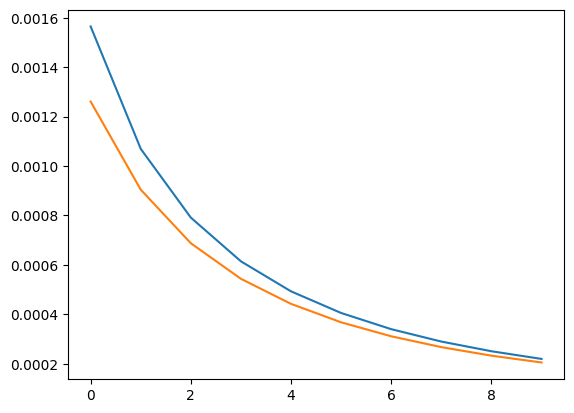

In [86]:
num_epochs = 10
trainingloss_history = []
testloss_history = []
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = trdnn(model, loss_fn, optimizer, train_loader)
    trainingloss_history.append(train_loss)
    test_loss = testDNN(model, loss_fn, valid_loader)
    testloss_history.append(test_loss)
print("Done!")

[0.0015646518521786979, 0.0010694656909831489, 0.0007911320172172661, 0.0006141627045503507, 0.0004927455943271828, 0.00040521833511690297, 0.00033972241522278637, 0.0002895593634360315, 0.0002504063708106211, 0.000219330603487712]
[0.0012608503210179603, 0.0009042389275665496, 0.000687341518781539, 0.0005435247455715144, 0.00044201367903552426, 0.00036746634625959326, 0.00031090750653015725, 0.00026703345789963793, 0.00023243920050071442, 0.0002049379129262357]


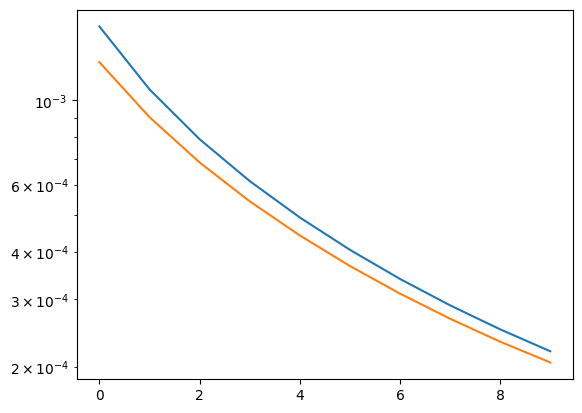

In [91]:
print(trainingloss_history)
plt.semilogy(trainingloss_history)
print(testloss_history)
plt.semilogy(testloss_history)

In [87]:
predictions = model(X_valid)
predictions

tensor([[0.0184],
        [0.0415],
        [0.0235],
        ...,
        [0.0304],
        [0.0314],
        [0.0282]], grad_fn=<AddmmBackward0>)

In [88]:
y_valid

tensor([[0.0279],
        [0.0253],
        [0.0303],
        ...,
        [0.0306],
        [0.0176],
        [0.0281]])

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
      optimizer.zero_grad()

      # Compute prediction and loss
      #print(X)
      pred = model(X)
      loss = loss_fn(pred, y)

        # Backpropagation
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      if batch % 100 == 0:
        loss, current = loss.item(), (batch + 1) * len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
      for X, y in dataloader:
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

#loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader, model, loss_fn, opt)
    test_loop(testloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.240515  [ 1000/240000]
loss: 0.175397  [101000/240000]
loss: 0.128265  [201000/240000]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.114086 

Epoch 2
-------------------------------
loss: 0.113717  [ 1000/240000]
loss: 0.089502  [101000/240000]
loss: 0.075885  [201000/240000]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.071467 

Epoch 3
-------------------------------
loss: 0.071889  [ 1000/240000]
loss: 0.062248  [101000/240000]
loss: 0.054193  [201000/240000]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.051241 

Epoch 4
-------------------------------
loss: 0.051213  [ 1000/240000]
loss: 0.044625  [101000/240000]
loss: 0.039081  [201000/240000]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.037039 

Epoch 5
-------------------------------
loss: 0.037235  [ 1000/240000]
loss: 0.032559  [101000/240000]
loss: 0.028144  [201000/240000]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.026832 

Epoch 6
-------------------------------
loss: 0.026957  [ 1000/240000]